<a href="https://colab.research.google.com/github/lucaSan2/NLP/blob/main/kopie_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
import pandas as pd

In [122]:
import numpy as np

In [123]:
import matplotlib.pyplot as plt

In [124]:
import seaborn as sns

In [125]:
df = pd.read_csv('/content/drive/MyDrive/ML/monatszahlen2307_verkehrsunfaelle_10_07_23_nosum.csv')

In [126]:
df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2023,202301,NaN,NaN,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2023,202302,NaN,NaN,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2023,202303,NaN,NaN,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2023,202304,NaN,NaN,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2023,202305,NaN,NaN,NaN,NaN,NaN


In [127]:
df.describe()

,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
count,2016.000000,2016.00000,1848.000000,1848.000000,1840.000000,1763.000000,1848.000000
mean,2011.500000,201156.50000,776.984848,776.984848,5.241538,1.897357,777.310065
std,6.923904,692.39901,1176.030443,1176.030443,40.926314,31.287810,1164.856446
min,2000.000000,200001.00000,0.000000,0.000000,-100.000000,-100.000000,12.000000
25%,2005.750000,200578.75000,38.000000,38.000000,-15.540000,-13.380000,40.000000
50%,2011.500000,201156.50000,358.500000,358.500000,0.000000,-1.130000,421.000000
75%,2017.250000,201734.25000,811.000000,811.000000,18.712500,11.485000,814.250000
max,2023.000000,202312.00000,4763.000000,4763.000000,600.000000,425.000000,3977.000000


In [128]:
df = df[df['Jahr']<= 2020]

KeyError: ignored

In [129]:
df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2023,202301,NaN,NaN,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2023,202302,NaN,NaN,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2023,202303,NaN,NaN,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2023,202304,NaN,NaN,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2023,202305,NaN,NaN,NaN,NaN,NaN


In [130]:
df.isna().sum()

MONATSZAHL                          0
AUSPRAEGUNG                         0
JAHR                                0
MONAT                               0
WERT                              168
VORJAHRESWERT                     168
VERAEND_VORMONAT_PROZENT          176
VERAEND_VORJAHRESMONAT_PROZENT    253
ZWOELF_MONATE_MITTELWERT          168
dtype: int64

In [131]:
#Imortamt columns have no missing values

In [132]:
pd.set_option('display.max_rows', None)

In [133]:
duplicates = df.duplicated(subset=['MONATSZAHL', 'AUSPRAEGUNG', 'MONAT'])

In [134]:
duplicates.sum()

0

In [135]:
df['MONAT'] = pd.to_datetime(df['MONAT'].astype(str), format='%Y%m')

In [136]:
df.set_index(df['MONAT'], inplace=True)

In [137]:
df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
MONAT,,,,,,,,,
2023-01-01,Alkoholunfälle,insgesamt,2023,2023-01-01,NaN,NaN,NaN,NaN,NaN
2023-02-01,Alkoholunfälle,insgesamt,2023,2023-02-01,NaN,NaN,NaN,NaN,NaN
2023-03-01,Alkoholunfälle,insgesamt,2023,2023-03-01,NaN,NaN,NaN,NaN,NaN
2023-04-01,Alkoholunfälle,insgesamt,2023,2023-04-01,NaN,NaN,NaN,NaN,NaN
2023-05-01,Alkoholunfälle,insgesamt,2023,2023-05-01,NaN,NaN,NaN,NaN,NaN


In [138]:
df.drop('MONAT', axis=1, inplace=True)

In [139]:
pivot_Wert = df.pivot_table(index='MONAT', columns=['MONATSZAHL', 'AUSPRAEGUNG'], values='WERT')

In [140]:
pivot_Wert.columns = ['_'.join(col).strip() for col in pivot_Wert.columns.values]

In [141]:
pivot_Wert.columns

Index(['Alkoholunfälle_Verletzte und Getötete', 'Alkoholunfälle_insgesamt',
       'Fluchtunfälle_Verletzte und Getötete', 'Fluchtunfälle_insgesamt',
       'Verkehrsunfälle_Verletzte und Getötete', 'Verkehrsunfälle_insgesamt',
       'Verkehrsunfälle_mit Personenschäden'],
      dtype='object')

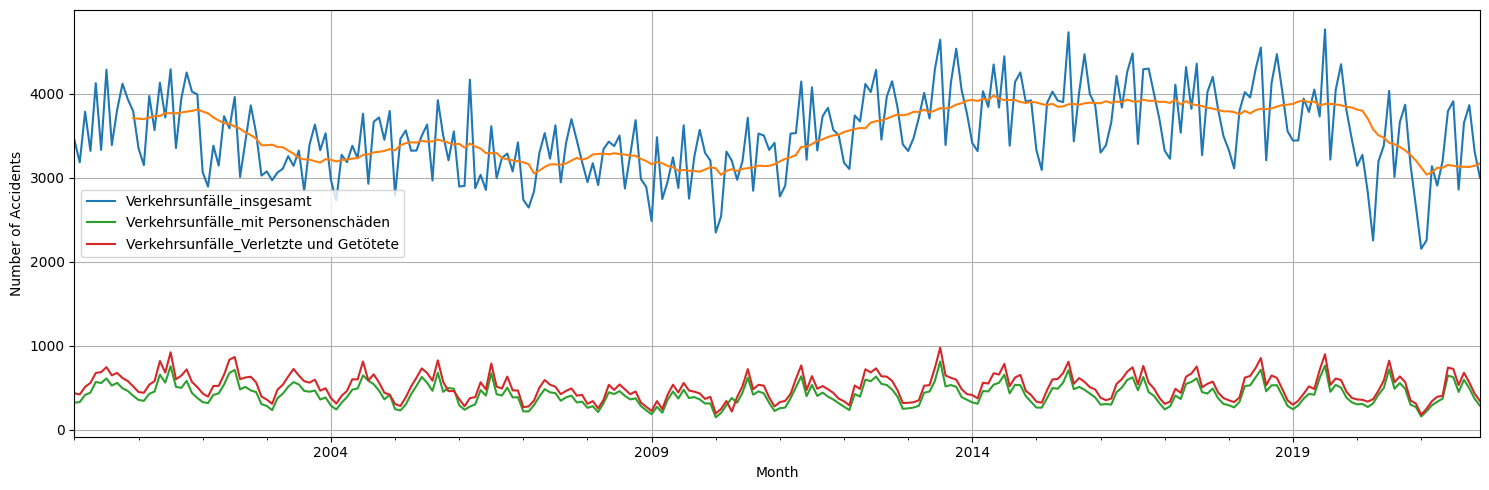

In [142]:
pivot_Wert['Verkehrsunfälle_insgesamt'].plot(figsize=(15, 5), legend=True)
pivot_Wert['Verkehrsunfälle_insgesamt'].rolling(window=12).mean().plot(figsize=(15, 5), legend=False)
pivot_Wert['Verkehrsunfälle_mit Personenschäden'].plot(figsize=(15, 5), legend=True)
pivot_Wert['Verkehrsunfälle_Verletzte und Getötete'].plot(figsize=(15, 5), legend=True)
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.tight_layout()

In [143]:
#Number of total accidents fluctuates between 3000 and 4000 (the rolling mean) accidents per month with a tendency to fall after the pandemic started.

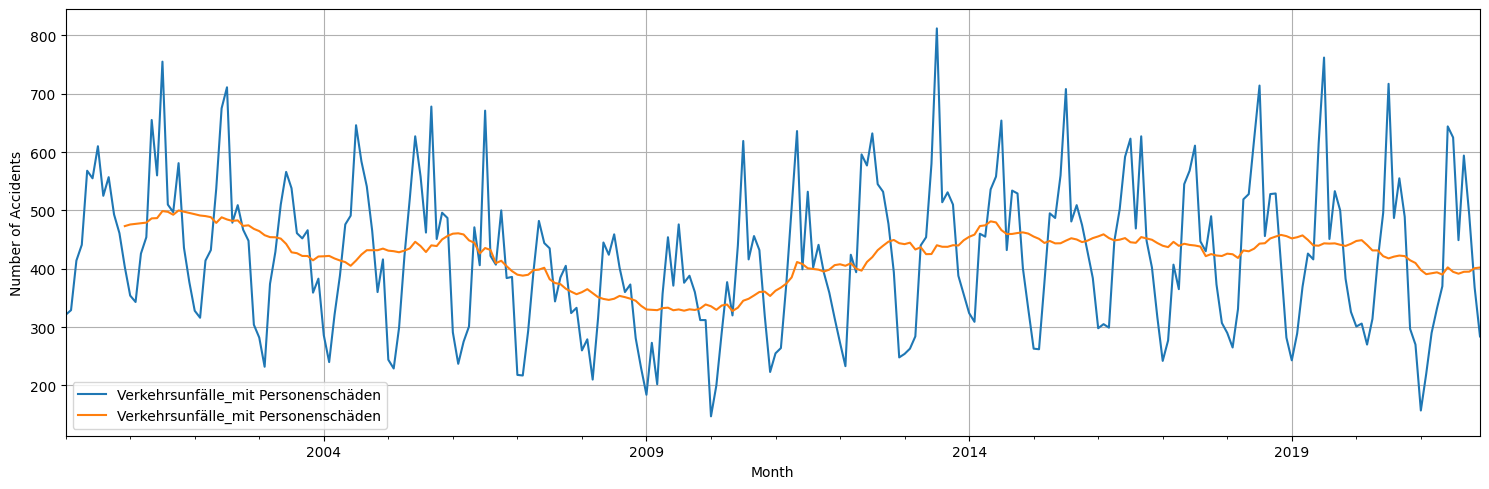

In [144]:
pivot_Wert['Verkehrsunfälle_mit Personenschäden'].plot(figsize=(15, 5), legend=True)
pivot_Wert['Verkehrsunfälle_mit Personenschäden'].rolling(window=12).mean().plot(figsize=(15, 5), legend=True)
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.tight_layout()

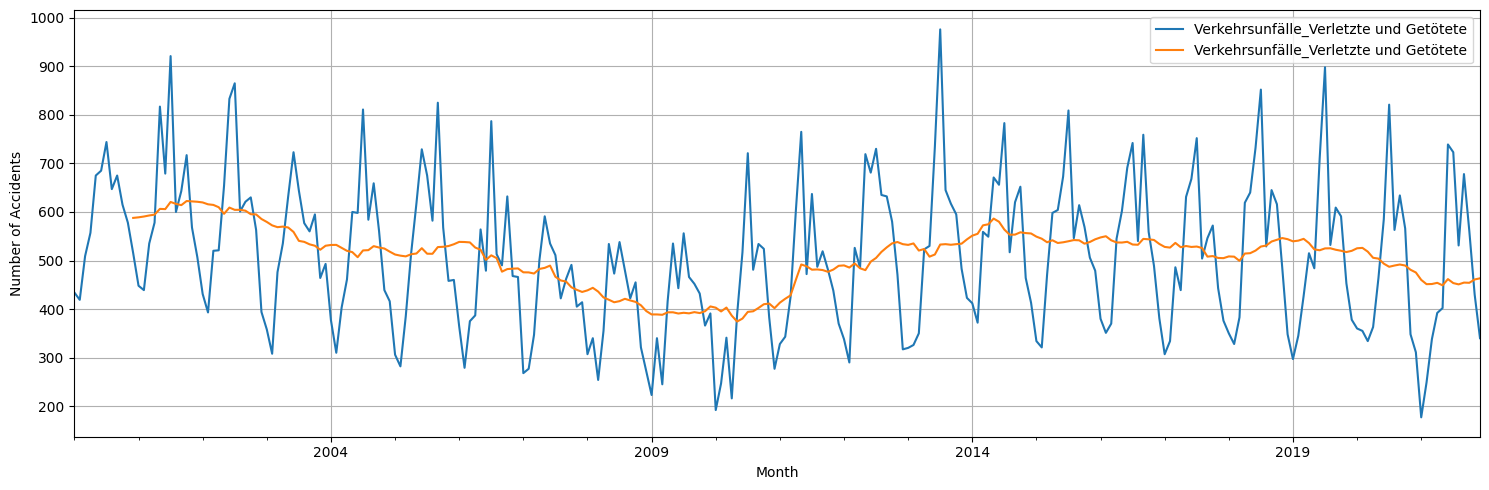

In [145]:
pivot_Wert['Verkehrsunfälle_Verletzte und Getötete'].plot(figsize=(15, 5), legend=True)
pivot_Wert['Verkehrsunfälle_Verletzte und Getötete'].rolling(window=12).mean().plot(figsize=(15, 5), legend=True)
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.tight_layout()

In [146]:
pivot_Wert['Verkehrsunfälle_Verletzte und Getötete'].corr(pivot_Wert['Verkehrsunfälle_mit Personenschäden'])

0.9829991075781358

In [147]:
#I might be able to drop one  of both since they do not contain any new information

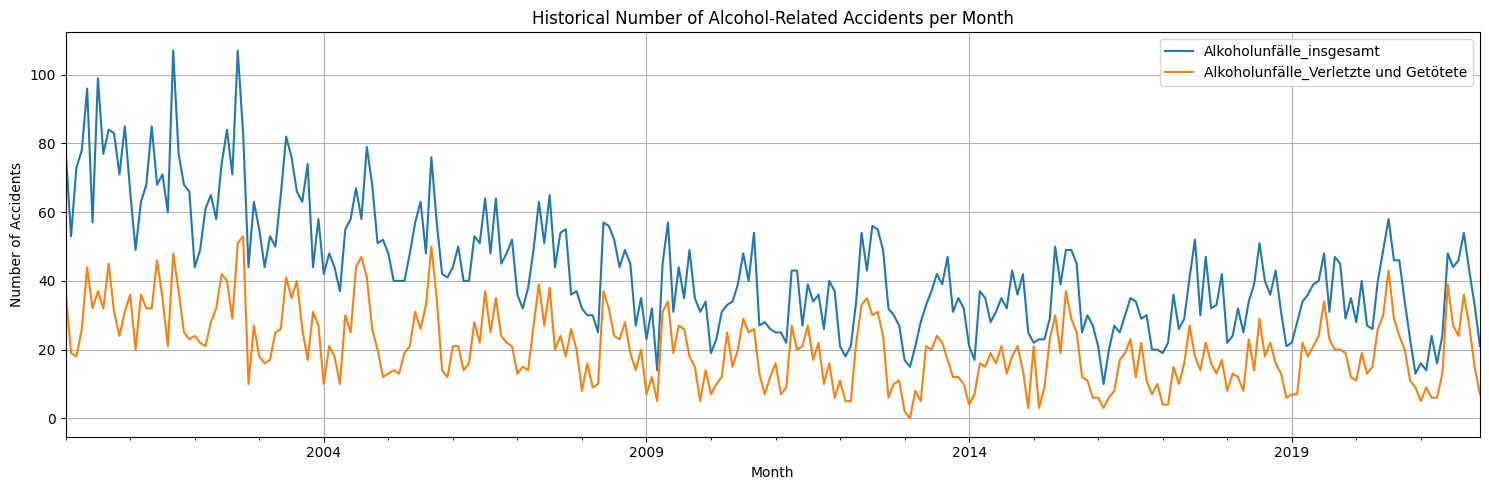

In [148]:
pivot_Wert['Alkoholunfälle_insgesamt'].plot(figsize=(15, 5), legend=True)
pivot_Wert['Alkoholunfälle_Verletzte und Getötete'].plot(figsize=(15, 5), legend=True)
plt.title('Historical Number of Alcohol-Related Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.tight_layout()

<Axes: xlabel='MONAT'>

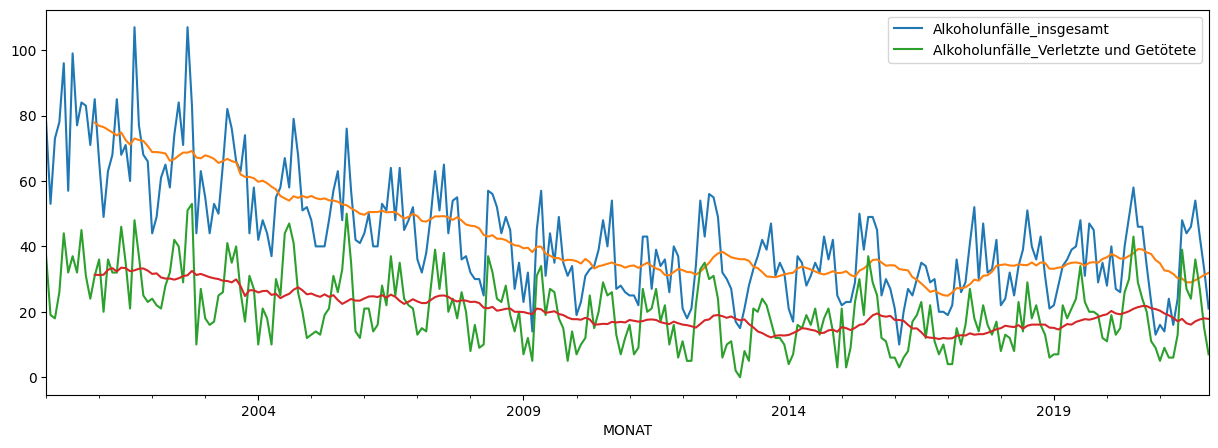

In [149]:
pivot_Wert['Alkoholunfälle_insgesamt'].plot(figsize=(15, 5), legend=True)
pivot_Wert['Alkoholunfälle_insgesamt'].rolling(window=12).mean().plot( legend=False)
pivot_Wert['Alkoholunfälle_Verletzte und Getötete'].plot( legend=True)
pivot_Wert['Alkoholunfälle_Verletzte und Getötete'].rolling(window=12).mean().plot( legend=False)

<Axes: xlabel='MONAT'>

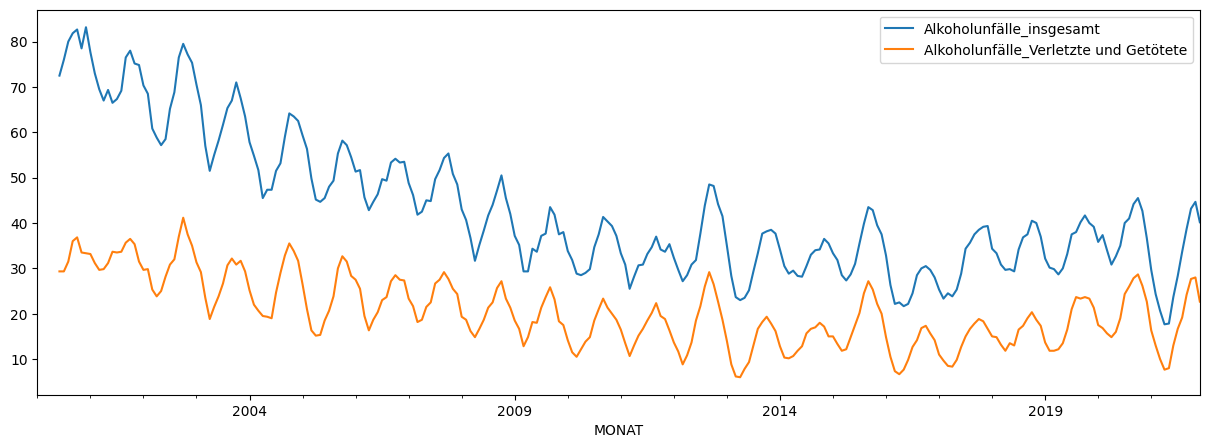

In [150]:
pivot_Wert['Alkoholunfälle_insgesamt'].rolling(window=6).mean().plot(figsize=(15, 5), legend=True)
pivot_Wert['Alkoholunfälle_Verletzte und Getötete'].rolling(window=6).mean().plot(figsize=(15, 5), legend=True)

<Axes: xlabel='MONAT'>

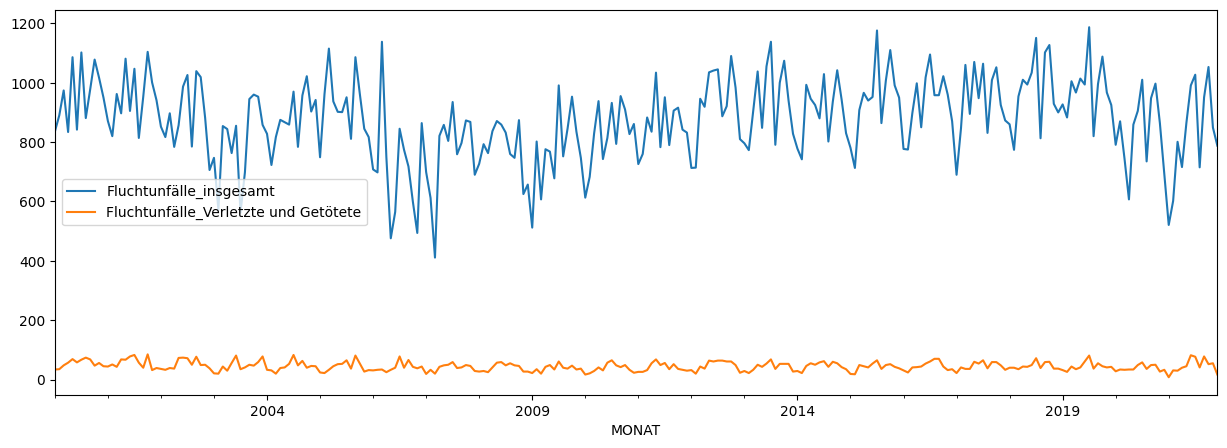

In [151]:
pivot_Wert['Fluchtunfälle_insgesamt'].plot(figsize=(15, 5), legend=True)
pivot_Wert['Fluchtunfälle_Verletzte und Getötete'].plot(figsize=(15, 5), legend=True)

<Axes: xlabel='MONAT'>

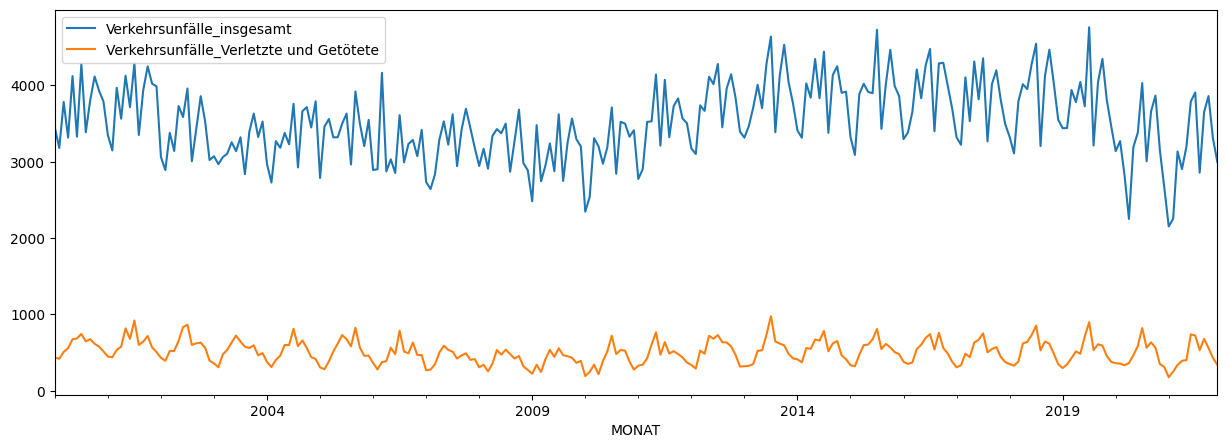

In [152]:
pivot_Wert['Verkehrsunfälle_insgesamt'].plot(figsize=(15, 5), legend=True)
pivot_Wert['Verkehrsunfälle_Verletzte und Getötete'].plot(figsize=(15, 5), legend=True)

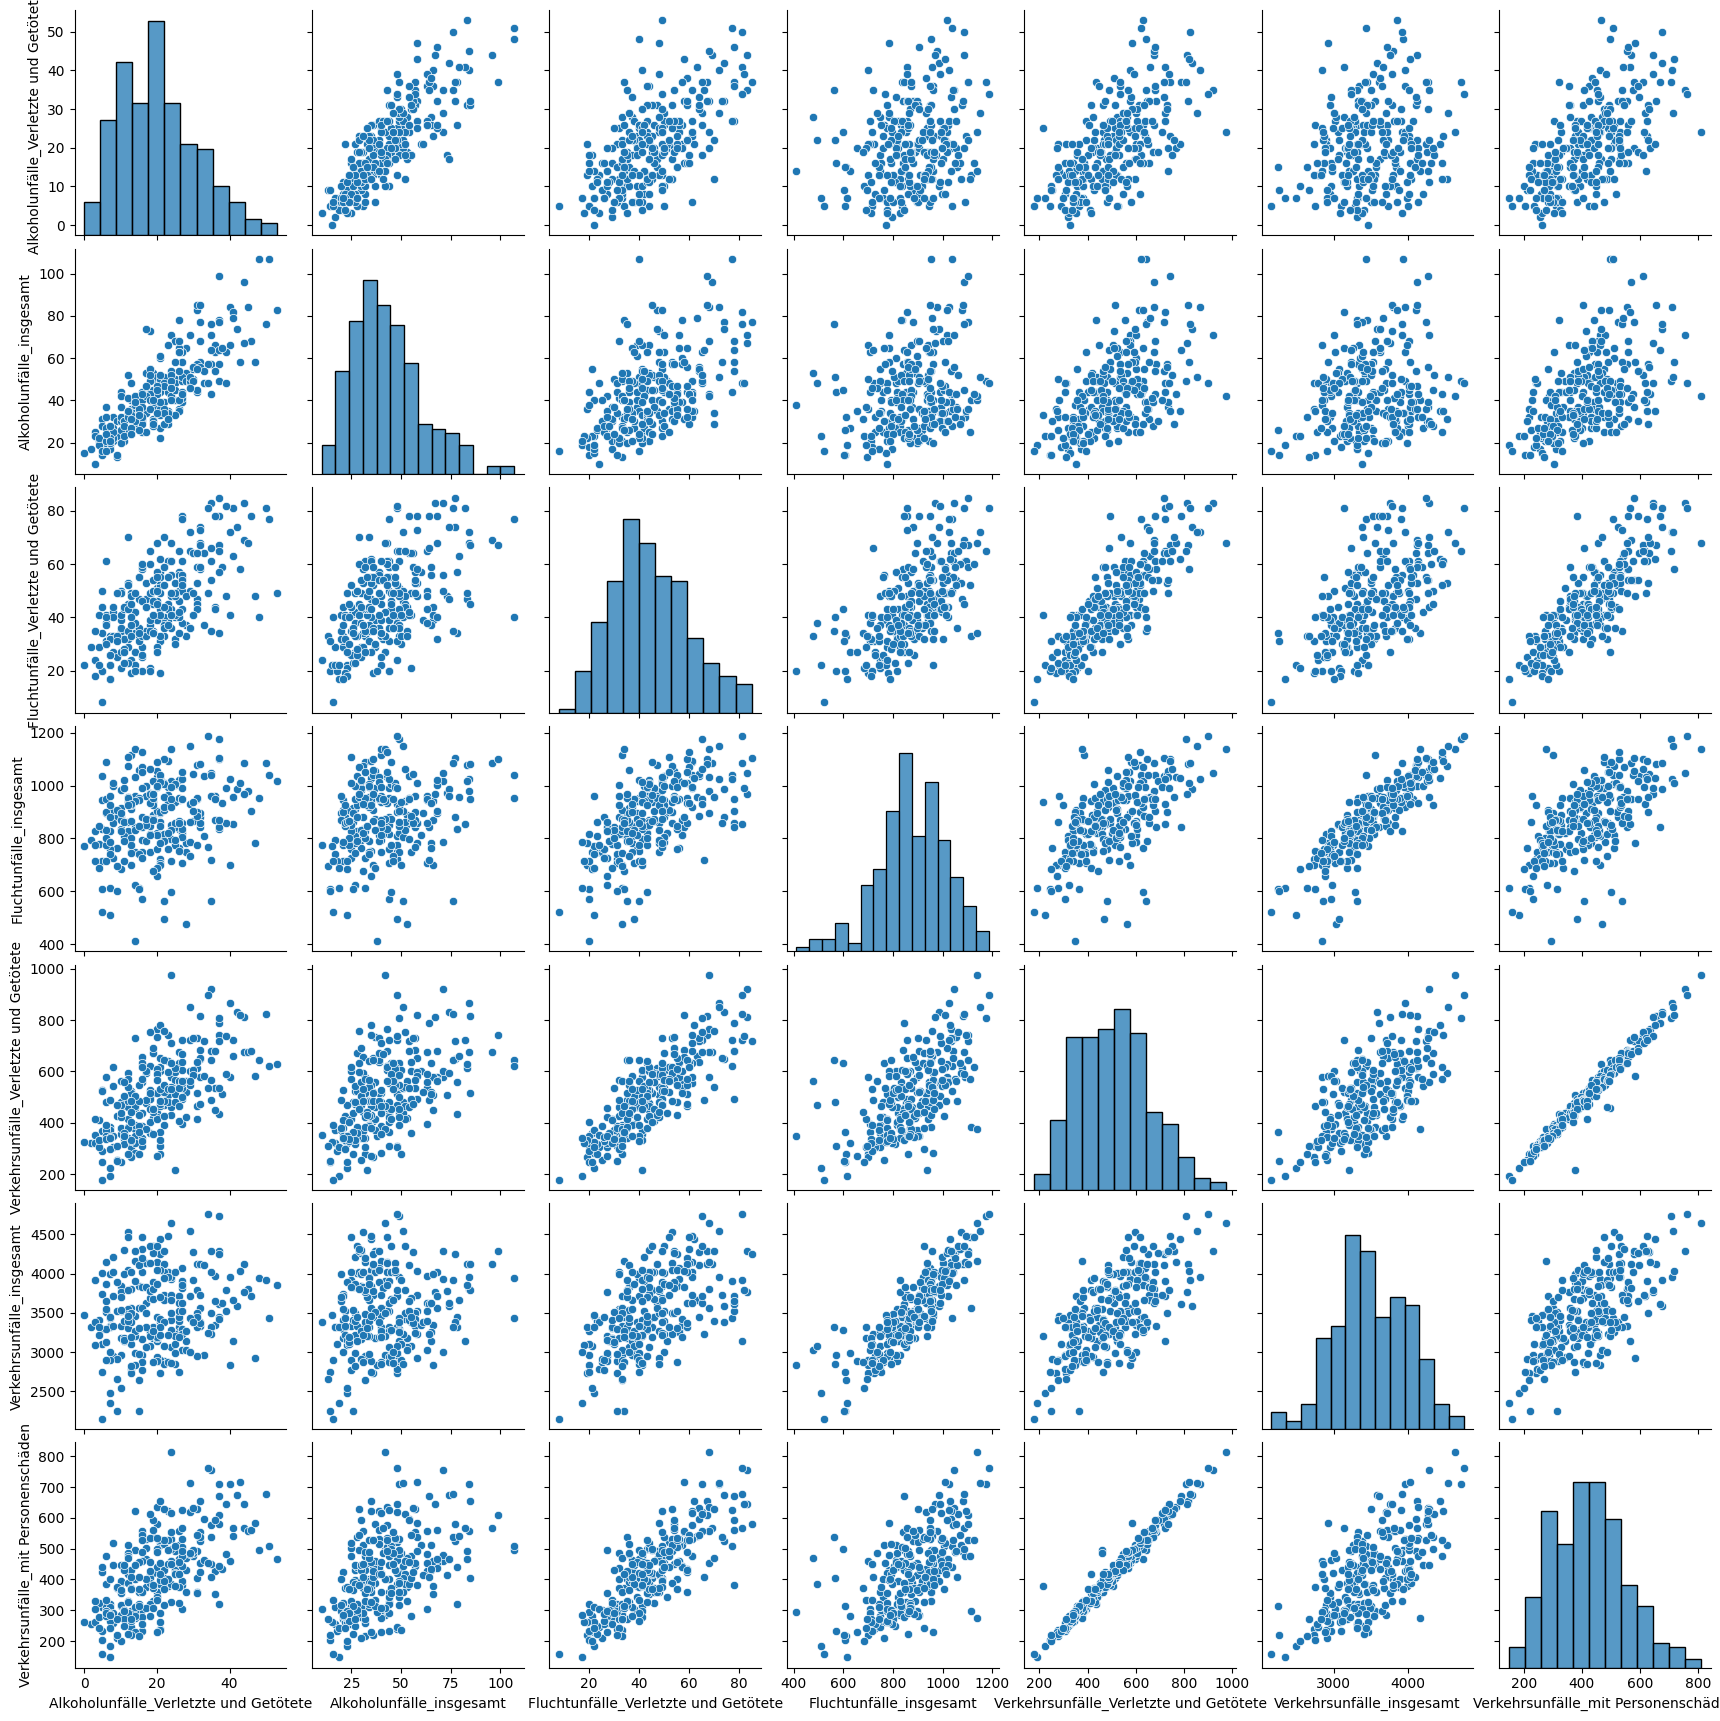

In [153]:
sns.pairplot(pivot_Wert, diag_kind='hist')

In [154]:
pivot_Wert.corr()

,Alkoholunfälle_Verletzte und Getötete,Alkoholunfälle_insgesamt,Fluchtunfälle_Verletzte und Getötete,Fluchtunfälle_insgesamt,Verkehrsunfälle_Verletzte und Getötete,Verkehrsunfälle_insgesamt,Verkehrsunfälle_mit Personenschäden
Alkoholunfälle_Verletzte und Getötete,1.000000,0.828843,0.630815,0.259679,0.642309,0.189774,0.625983
Alkoholunfälle_insgesamt,0.828843,1.000000,0.535615,0.260127,0.546142,0.184830,0.503540
Fluchtunfälle_Verletzte und Getötete,0.630815,0.535615,1.000000,0.604228,0.828905,0.566723,0.825517
Fluchtunfälle_insgesamt,0.259679,0.260127,0.604228,1.000000,0.622563,0.868643,0.621662
Verkehrsunfälle_Verletzte und Getötete,0.642309,0.546142,0.828905,0.622563,1.000000,0.675997,0.982999
Verkehrsunfälle_insgesamt,0.189774,0.184830,0.566723,0.868643,0.675997,1.000000,0.668602
Verkehrsunfälle_mit Personenschäden,0.625983,0.503540,0.825517,0.621662,0.982999,0.668602,1.000000


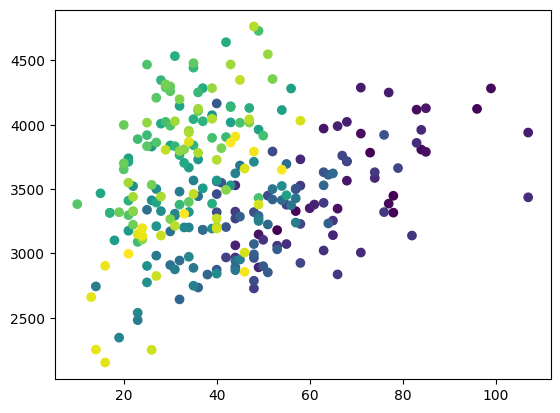

In [155]:
plt.scatter(pivot_Wert['Alkoholunfälle_insgesamt'], pivot_Wert['Verkehrsunfälle_insgesamt'], c=pivot_Wert.index, cmap='viridis')

In [156]:
pivot_Wert['Alkoholunfälle_insgesamt'].corr(pivot_Wert['Verkehrsunfälle_insgesamt'])

0.18483027925337997

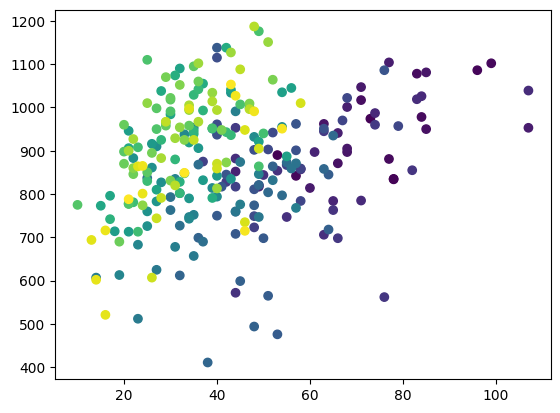

In [157]:
plt.scatter(pivot_Wert['Alkoholunfälle_insgesamt'], pivot_Wert['Fluchtunfälle_insgesamt'], c=pivot_Wert.index, cmap='viridis')

In [158]:
pivot_Wert['Alkoholunfälle_insgesamt'].corr(pivot_Wert['Fluchtunfälle_insgesamt'])

0.26012704354106875

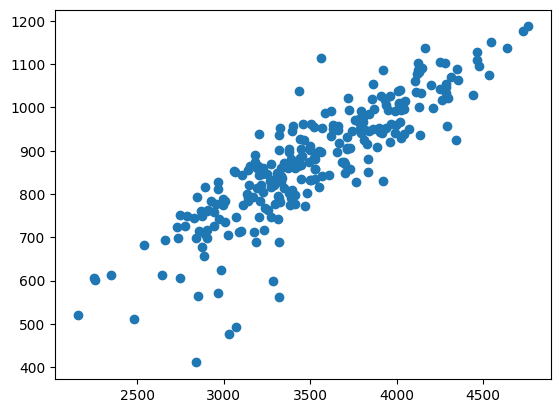

In [159]:
plt.scatter(pivot_Wert['Verkehrsunfälle_insgesamt'], pivot_Wert['Fluchtunfälle_insgesamt'])

In [160]:
pivot_Wert['Fluchtunfälle_insgesamt'].corr(pivot_Wert['Verkehrsunfälle_insgesamt'])

0.8686434963705112

In [161]:
#Alkoholunfälle has almost no correlation with Fluchtunfälle and Verkehrsunfälle but Fluchtunfälle and Verkehrsunfälle correlate with eachother

In [162]:
#Why does Alkoholunfälle not correlate with the total number of accidents?

In [163]:
pivot_Wert.groupby(pivot_Wert.index.year).sum()[['Alkoholunfälle_insgesamt', 'Verkehrsunfälle_Verletzte und Getötete', 'Fluchtunfälle_Verletzte und Getötete']]

,Alkoholunfälle_insgesamt,Verkehrsunfälle_Verletzte und Getötete,Fluchtunfälle_Verletzte und Getötete
MONAT,,,
2000,934.0,7053.0,658.0
2001,848.0,7452.0,687.0
2002,803.0,7026.0,628.0
2003,730.0,6365.0,562.0
2004,659.0,6219.0,542.0
2005,600.0,6402.0,525.0
2006,599.0,5804.0,505.0
2007,560.0,5223.0,476.0
2008,482.0,4751.0,489.0


In [164]:
pivot_pct = pd.DataFrame()

In [165]:
pivot_pct.index= pivot_Wert.index

In [166]:
pivot_Wert.columns

Index(['Alkoholunfälle_Verletzte und Getötete', 'Alkoholunfälle_insgesamt',
       'Fluchtunfälle_Verletzte und Getötete', 'Fluchtunfälle_insgesamt',
       'Verkehrsunfälle_Verletzte und Getötete', 'Verkehrsunfälle_insgesamt',
       'Verkehrsunfälle_mit Personenschäden'],
      dtype='object')

In [167]:
pivot_pct['Alkoholunfälle_Verletzte und Getötete'] = np.round(pivot_Wert['Alkoholunfälle_Verletzte und Getötete']*100 / pivot_Wert['Verkehrsunfälle_insgesamt'],2)

In [168]:
pivot_pct['Alkoholunfälle_insgesamt'] = np.round(pivot_Wert['Alkoholunfälle_insgesamt']*100 / pivot_Wert['Verkehrsunfälle_insgesamt'], 2)

Text(0.5, 1.0, 'Total number of alcohol related accidents in relation to total number accidents')

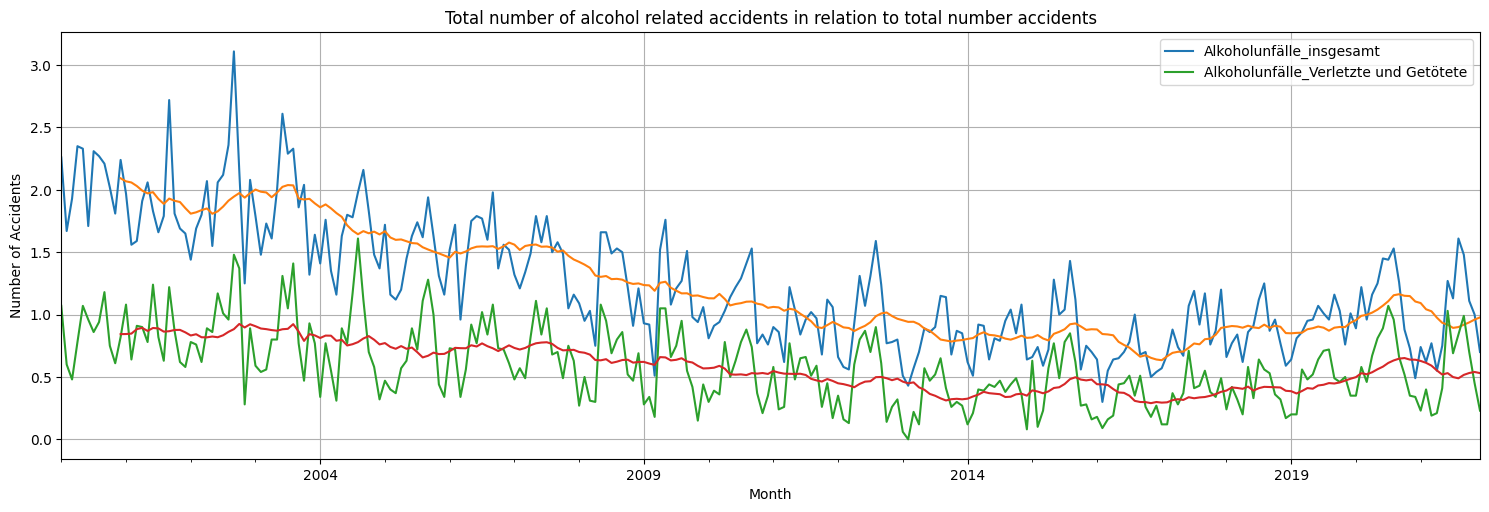

In [169]:
pivot_pct['Alkoholunfälle_insgesamt'].plot(figsize=(15, 5), legend=True)
pivot_pct['Alkoholunfälle_insgesamt'].rolling(window=12).mean().plot( legend=False)
pivot_pct['Alkoholunfälle_Verletzte und Getötete'].plot( legend=True)
pivot_pct['Alkoholunfälle_Verletzte und Getötete'].rolling(window=12).mean().plot( legend=False)
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.tight_layout()
plt.title('Total number of alcohol related accidents in relation to total number accidents')

In [170]:
pivot_pct['Fluchtunfälle_Verletzte und Getötete'] = np.round(pivot_Wert['Fluchtunfälle_Verletzte und Getötete']*100 / pivot_Wert['Verkehrsunfälle_insgesamt'],2)

In [171]:
pivot_pct['Fluchtunfälle_insgesamt'] = np.round(pivot_Wert['Fluchtunfälle_insgesamt']*100 / pivot_Wert['Verkehrsunfälle_insgesamt'], 2)

Text(0.5, 1.0, '')

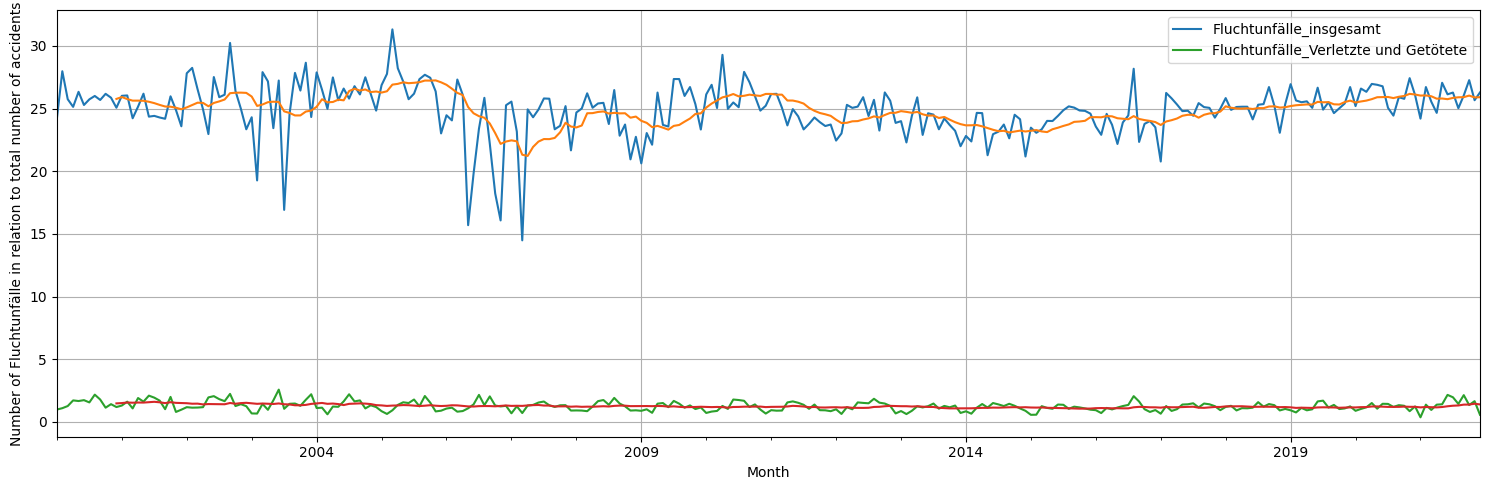

In [172]:
pivot_pct['Fluchtunfälle_insgesamt'].plot(figsize=(15, 5), legend=True)
pivot_pct['Fluchtunfälle_insgesamt'].rolling(window=12).mean().plot( legend=False)
pivot_pct['Fluchtunfälle_Verletzte und Getötete'].plot( legend=True)
pivot_pct['Fluchtunfälle_Verletzte und Getötete'].rolling(window=12).mean().plot( legend=False)
plt.xlabel('Month')
plt.ylabel('Number of Fluchtunfälle in relation to total number of accidents')
plt.grid(True)
plt.tight_layout()
plt.title('')

In [173]:
pivot_Wert.describe()

,Alkoholunfälle_Verletzte und Getötete,Alkoholunfälle_insgesamt,Fluchtunfälle_Verletzte und Getötete,Fluchtunfälle_insgesamt,Verkehrsunfälle_Verletzte und Getötete,Verkehrsunfälle_insgesamt,Verkehrsunfälle_mit Personenschäden
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,20.568182,43.215909,44.954545,876.875000,509.340909,3520.412879,423.526515
std,10.739355,18.066701,15.436791,136.937288,150.372356,489.594991,126.817701
min,0.000000,10.000000,8.000000,411.000000,177.000000,2153.000000,147.000000
25%,12.000000,30.000000,34.000000,791.000000,388.500000,3196.000000,319.750000
50%,20.000000,40.000000,43.000000,873.500000,506.500000,3464.500000,422.000000
75%,27.000000,53.000000,55.000000,966.250000,610.250000,3890.500000,506.000000
max,53.000000,107.000000,85.000000,1187.000000,976.000000,4763.000000,812.000000


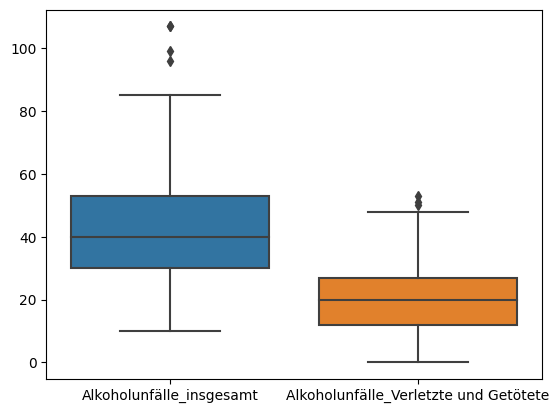

In [174]:
sns.boxplot(data=pivot_Wert[['Alkoholunfälle_insgesamt', 'Alkoholunfälle_Verletzte und Getötete']])
sns.set(rc={'figure.figsize':(7.7,4.27)})

In [175]:
pivot_Wert[['Alkoholunfälle_insgesamt', 'Alkoholunfälle_Verletzte und Getötete']].skew()

Alkoholunfälle_insgesamt                 0.865882
Alkoholunfälle_Verletzte und Getötete    0.551467
dtype: float64

In [176]:
pivot_Wert['Alkoholunfälle_insgesamt_log'] = np.log1p(pivot_Wert['Alkoholunfälle_insgesamt'])

In [177]:
pivot_Wert['Alkoholunfälle_insgesamt_log'].skew()

-0.20210640256327808

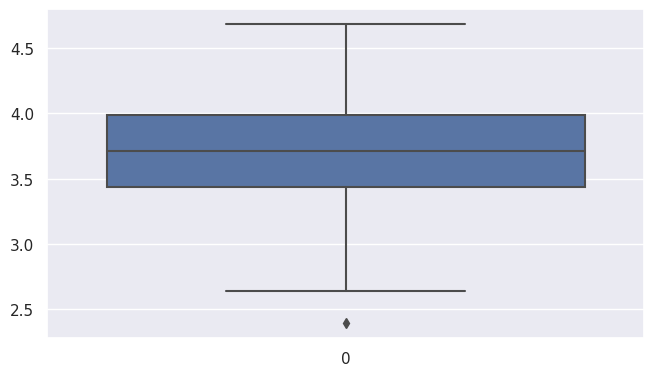

In [178]:
sns.boxplot(data=pivot_Wert['Alkoholunfälle_insgesamt_log'])
sns.set(rc={'figure.figsize':(1.7,2.27)})

In [179]:
#The distribution had a moderate right skew, after transformation skewness is close to 0. Data is now more symmetric, close to a normal distribution.

In [180]:
pivot_Wert['Alkoholunfälle_Verletzte und Getötete_log'] = np.log1p(pivot_Wert['Alkoholunfälle_Verletzte und Getötete'])

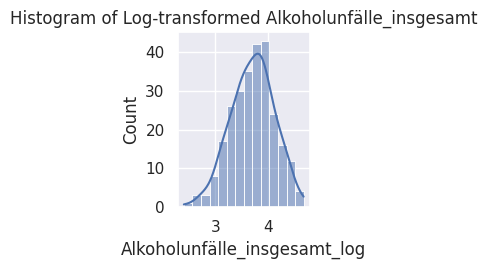

In [181]:
sns.histplot(pivot_Wert['Alkoholunfälle_insgesamt_log'], kde=True).set(title='Histogram of Log-transformed Alkoholunfälle_insgesamt')
sns.set(rc={'figure.figsize':(5.7,8.27)})

In [182]:
def percentage_change(values):
  previous_values = values[:-1]
  last_value= values[-1]

  percent_change = (last_value - np.mean(previous_values))*100/np.mean(previous_values)
  return percent_change

In [183]:
pivot_pct['Alkoholunfälle_deviation_from_mean']= pivot_Wert['Alkoholunfälle_insgesamt'].rolling(window=20).aggregate(percentage_change)

Text(0.5, 1.0, '% change over time ')

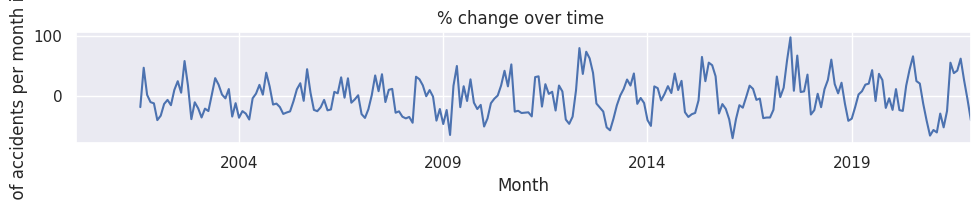

In [184]:
pivot_pct['Alkoholunfälle_deviation_from_mean'].plot(figsize=(10,2))
plt.xlabel('Month')
plt.ylabel('Percentage change of total number of accidents per month in relation to mean (20 month window)')
plt.grid(True)
plt.tight_layout()
plt.title('% change over time ')

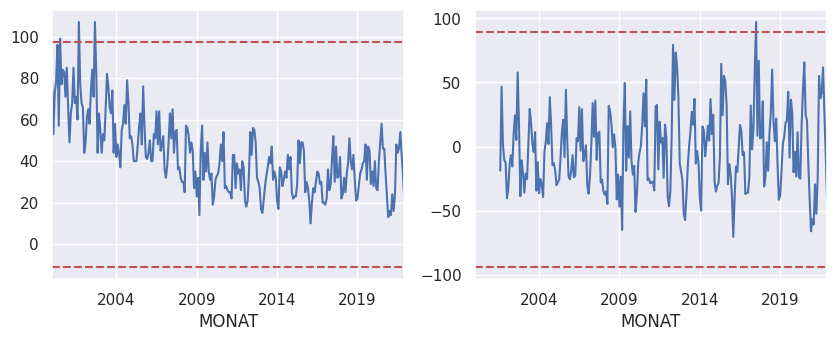

In [185]:
fix, axs= plt.subplots(1,2, figsize=(10,3.5))
for data, ax in zip([pivot_Wert['Alkoholunfälle_insgesamt'],pivot_pct['Alkoholunfälle_deviation_from_mean']], axs):
  this_mean= data.mean()
  this_std= data.std()

  data.plot(ax=ax)
  ax.axhline(this_mean + this_std *3, ls='--', c='r')
  ax.axhline(this_mean - this_std *3, ls='--', c='r')

In [186]:
#The volatility is generally high, though not many outliers are present. no need to replace them.

In [187]:
number_of_lags = 4  # for example, using a 3-month lag
for lag in range(1, number_of_lags + 1):
    pivot_Wert[f'lag_Alk_ins{lag}'] = pivot_Wert['Alkoholunfälle_insgesamt'].shift(lag)

In [188]:
pivot_Wert['std_Alhokohlunfälle_insgesamt'] = pivot_Wert['lag_Alk_ins1'].rolling(window=20).aggregate(np.std)

In [189]:
pivot_Wert['median_Alhokohlunfälle_insgesamt'] =pivot_Wert['lag_Alk_ins1'].rolling(window=20).aggregate(np.median)

Text(0.5, 1.0, 'Rolling std and median of Alkohohlunfälle_insgesamt')

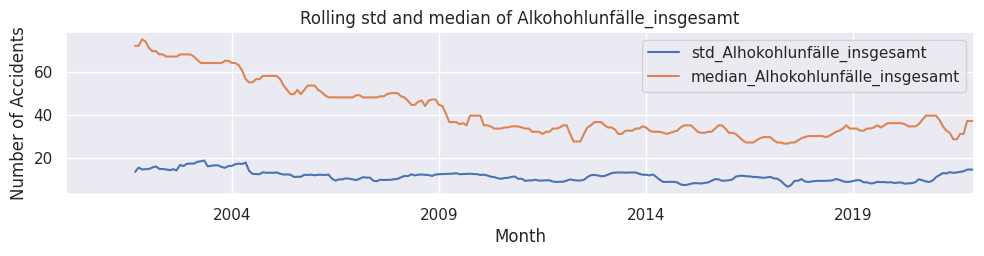

In [190]:
pivot_Wert['std_Alhokohlunfälle_insgesamt'].plot(legend=True, figsize=(10,2.5))
pivot_Wert['median_Alhokohlunfälle_insgesamt'].plot(legend=True)
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.tight_layout()
plt.title('Rolling std and median of Alkohohlunfälle_insgesamt')

In [191]:
pivot_Wert.dropna(inplace=True)

In [192]:
pivot_Wert.columns

Index(['Alkoholunfälle_Verletzte und Getötete', 'Alkoholunfälle_insgesamt',
       'Fluchtunfälle_Verletzte und Getötete', 'Fluchtunfälle_insgesamt',
       'Verkehrsunfälle_Verletzte und Getötete', 'Verkehrsunfälle_insgesamt',
       'Verkehrsunfälle_mit Personenschäden', 'Alkoholunfälle_insgesamt_log',
       'Alkoholunfälle_Verletzte und Getötete_log', 'lag_Alk_ins1',
       'lag_Alk_ins2', 'lag_Alk_ins3', 'lag_Alk_ins4',
       'std_Alhokohlunfälle_insgesamt', 'median_Alhokohlunfälle_insgesamt'],
      dtype='object')

In [193]:
X= pivot_Wert[['lag_Alk_ins1',
       'lag_Alk_ins2', 'lag_Alk_ins3', 'lag_Alk_ins4','median_Alhokohlunfälle_insgesamt', 'std_Alhokohlunfälle_insgesamt' ]]

In [194]:
features= ['lag_Alk_ins1',
       'lag_Alk_ins2', 'lag_Alk_ins3', 'lag_Alk_ins4','median_Alhokohlunfälle_insgesamt', 'std_Alhokohlunfälle_insgesamt']

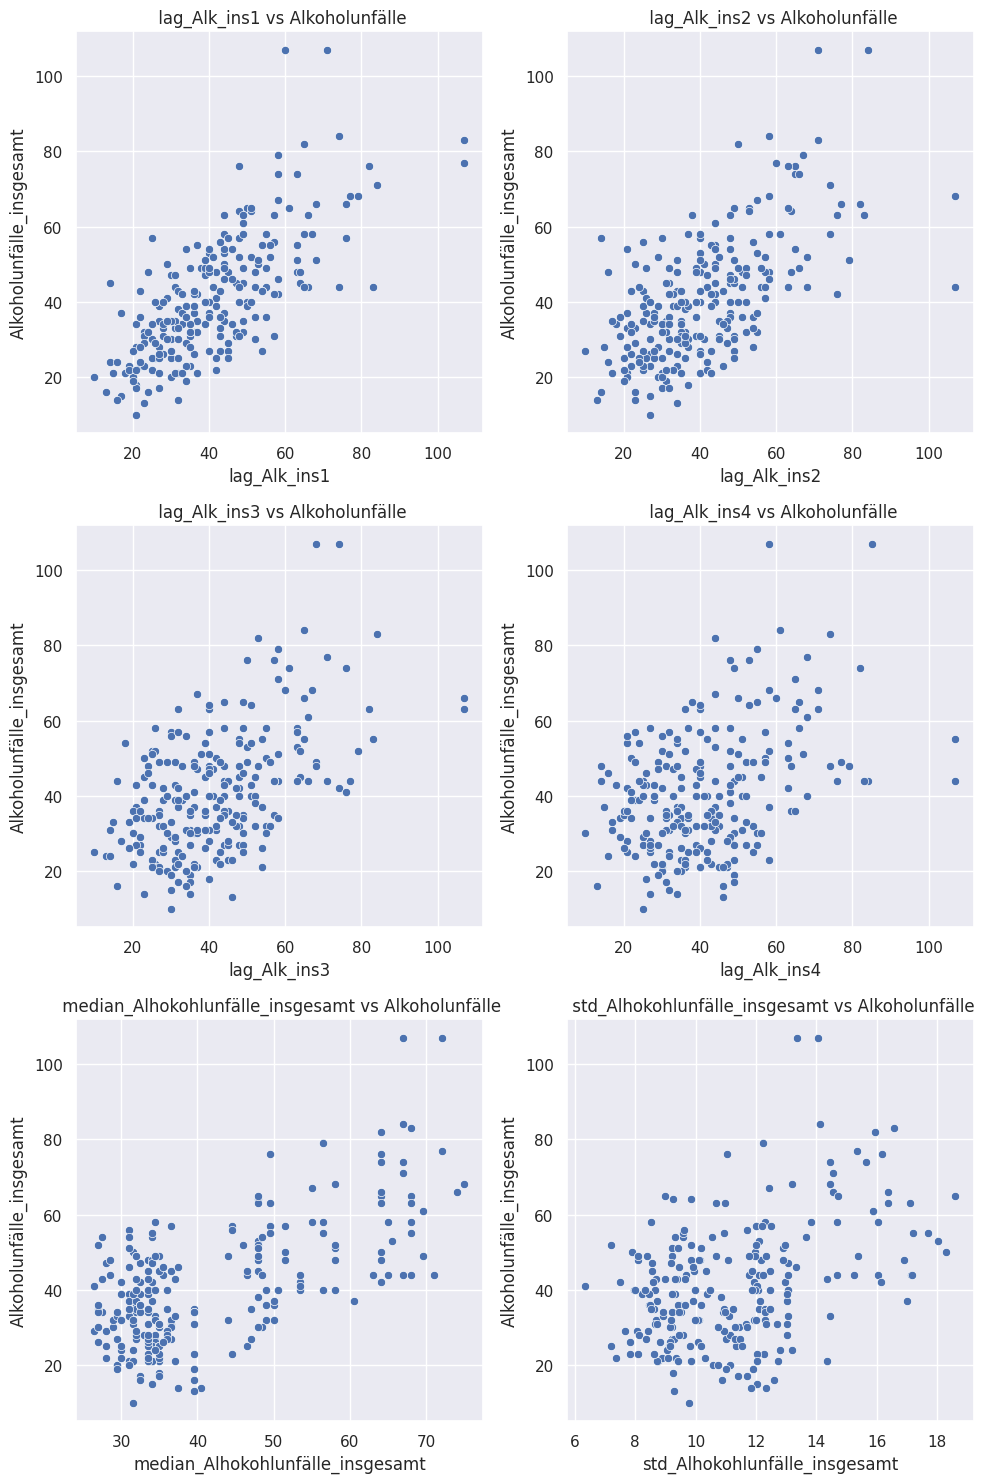

In [195]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.scatterplot(x=pivot_Wert[feature], y=pivot_Wert['Alkoholunfälle_insgesamt'], ax=axes[i])
    axes[i].set_title(f' {feature} vs Alkoholunfälle')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Alkoholunfälle_insgesamt')


plt.tight_layout()
plt.show()


In [196]:
corr_matrix = pivot_Wert.corr()

In [197]:
corr_matrix[features].loc['Alkoholunfälle_insgesamt']

lag_Alk_ins1                        0.718042
lag_Alk_ins2                        0.619328
lag_Alk_ins3                        0.522414
lag_Alk_ins4                        0.391040
median_Alhokohlunfälle_insgesamt    0.647433
std_Alhokohlunfälle_insgesamt       0.418284
Name: Alkoholunfälle_insgesamt, dtype: float64

In [198]:
y= pivot_Wert['Alkoholunfälle_insgesamt']

In [199]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

In [200]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [201]:
log_transformer = FunctionTransformer(np.log1p, validate=True)

In [202]:
from sklearn.linear_model import Ridge

In [203]:
pipeline_ridge = Pipeline([
    ('log_transform', log_transformer),
    ('regressor', Ridge())
])

In [204]:
tscv= TimeSeriesSplit(n_splits=5)

In [205]:
mse_scores= []
mae_scores= []

In [206]:
for train_index, test_index in tscv.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  pipeline_ridge.fit(X_train, y_train)
  y_pred = pipeline_ridge.predict(X_test)
  y_pred_org= np.expm1(y_pred)
  mse= mean_squared_error(y_test,y_pred_org)
  mse_scores.append(mse)
  mae= mean_absolute_error(y_test, y_pred_org)
  mae_scores.append(mae)


In [207]:
mse_scores

[6.698596669811576e+54,
 8.330961983818932e+41,
 6.608717751935444e+38,
 6.153003204524915e+36,
 8.09761335495953e+41]

In [208]:
np.mean(mse_scores)

1.3397193339626438e+54

In [209]:
np.mean(mae_scores)

1.89713602097247e+26

In [210]:
pipeline_ridge['regressor'].coef_

array([17.72379841,  5.01810107,  1.18499457, -8.44712365, 21.99420823,
        1.93055602])

In [211]:
X.columns

Index(['lag_Alk_ins1', 'lag_Alk_ins2', 'lag_Alk_ins3', 'lag_Alk_ins4',
       'median_Alhokohlunfälle_insgesamt', 'std_Alhokohlunfälle_insgesamt'],
      dtype='object')

Text(0.5, 1.0, 'Ridge Coefficients')

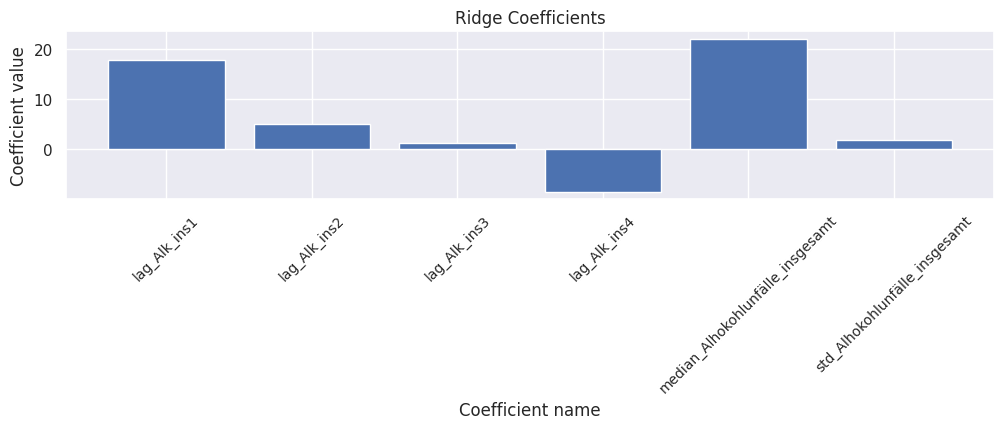

In [212]:
plt.figure(figsize=(10,4))
plt.bar(X.columns, pipeline_ridge['regressor'].coef_)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.xlabel('Coefficient name')
plt.ylabel('Coefficient value')
plt.title('Ridge Coefficients')

In [213]:
#The signal doesn't seem to be very smooth.

In [214]:
#Lets try a DecisionTreeRegressor

In [215]:
import xgboost as xgb
from xgboost import XGBRegressor

In [216]:
gb = XGBRegressor(n_estimators=150, learning_rate=0.1, objective='reg:squarederror')

In [217]:
pipeline_gb = Pipeline([
    ('log_transform', log_transformer),
    ('regressor', gb)
])

In [218]:
tscv= TimeSeriesSplit(n_splits=5)

In [219]:
mse_scores= []
mae_scores= []

In [220]:
for train_index, test_index in tscv.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  pipeline_gb.fit(X_train, y_train)
  y_pred = pipeline_gb.predict(X_test)
  y_pred_org= np.expm1(y_pred)
  mse= mean_squared_error(y_test,y_pred_org)
  mse_scores.append(mse)
  mae= mean_absolute_error(y_test, y_pred_org)
  mae_scores.append(mae)
  #Da vlt ibaue

In [221]:
mse_scores

[7.851754626969663e+60,
 1.1057481244292115e+48,
 8.07897820115419e+41,
 1.1735893292280033e+42,
 1.0700289038131277e+45]

In [222]:
np.mean(mse_scores)

1.570350925394154e+60

In [223]:
np.mean(mae_scores)

9.94589780075112e+28

In [224]:
pipeline_gb['regressor'].feature_importances_

array([0.08145376, 0.07344978, 0.04262407, 0.08515138, 0.6516405 ,
       0.06568049], dtype=float32)

In [248]:
df.to_csv('data1.csv')

In [249]:
pivot_Wert.to_csv('data2.csv')

In [228]:
df2= pd.read_csv('/content/drive/MyDrive/ML/monatszahlen2307_verkehrsunfaelle_10_07_23_nosum.csv')


In [229]:
df2 = df2[df2['MONAT']<= 202101]

In [230]:
df2['MONAT'] = pd.to_datetime(df2['MONAT'].astype(str), format='%Y%m')

<ipython-input-230-8ed898c1e8e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['MONAT'] = pd.to_datetime(df2['MONAT'].astype(str), format='%Y%m')


In [231]:
df2.set_index(df2['MONAT'], inplace=True)

In [232]:
df2.drop('MONAT', axis=1, inplace=True)

In [233]:
pivot2 = df2.pivot_table(index='MONAT', columns=['MONATSZAHL', 'AUSPRAEGUNG'], values='WERT')

In [234]:
pivot2.columns = ['_'.join(col).strip() for col in pivot2.columns.values]

In [235]:
number_of_lags = 4  # for example, using a 3-month lag
for lag in range(1, number_of_lags + 1):
    pivot2[f'lag_Alk_ins{lag}'] = pivot2['Alkoholunfälle_insgesamt'].shift(lag)

In [236]:
pivot2['std_Alhokohlunfälle_insgesamt'] = pivot2['lag_Alk_ins1'].rolling(window=20).aggregate(np.std)

In [237]:
pivot2['median_Alhokohlunfälle_insgesamt'] =pivot2['lag_Alk_ins1'].rolling(window=20).aggregate(np.median)

In [238]:
pivot2.dropna(inplace=True)

In [244]:
X2= pivot2.loc['2021-01-01'][['lag_Alk_ins1',
       'lag_Alk_ins2', 'lag_Alk_ins3', 'lag_Alk_ins4','median_Alhokohlunfälle_insgesamt', 'std_Alhokohlunfälle_insgesamt' ]].values

In [240]:
y2= pivot2.loc['2021-01-01']['Alkoholunfälle_insgesamt']

In [246]:
pipeline_ridge.predict([X2])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(


array([17.3960886])

In [247]:
y2

16.0

In [ ]:
def auto_predict(Year , Month):
  df2.loc[Year, Month]